In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/Input/Ecommerce 2024'

file_names = os.listdir(folder_path)

if os.path.exists(folder_path):
    file_names = os.listdir(folder_path)
    print("Files in folder:")
    for file_name in file_names:
        print(file_name)
else:
    print(f"Folder not found: {folder_path}")

Mounted at /content/drive
Files in folder:
product_details.csv
E-commerece sales data 2024.csv
customer_details.csv
Regression Test.gsheet


In [ ]:
df_customer=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Input/Ecommerce 2024/customer_details.csv')

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df_customer.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df_customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df_customer.columns = df_customer.columns.str.lower().str.replace(" ", "_")

print(df_customer)

      customer_id  age  gender item_purchased     category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      purchase_amount_(usd)       location size      color  season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [ ]:
data_for_clustering = df_customer[['purchase_amount_(usd)', 'frequency_of_purchases']]


In [ ]:
# Step 1: Convert frequency_of_purchases to numerical values
frequency_map = {
    'Fortnightly': 14,        # Every 2 weeks
    'Weekly': 7,              # Every 1 week
    'Annually': 365,          # Every year
    'Quarterly': 91,          # Every 3 months
    'Bi-Weekly': 14,          # Every 2 weeks
    'Monthly': 30,            # Every month
    'Every 3 Months': 91      # Every 3 months
}

df_customer['frequency_of_purchases_days'] = df_customer['frequency_of_purchases'].map(frequency_map)

# Step 2: Prepare the dataset for clustering
data_for_clustering = df_customer[['purchase_amount_(usd)', 'frequency_of_purchases_days']]



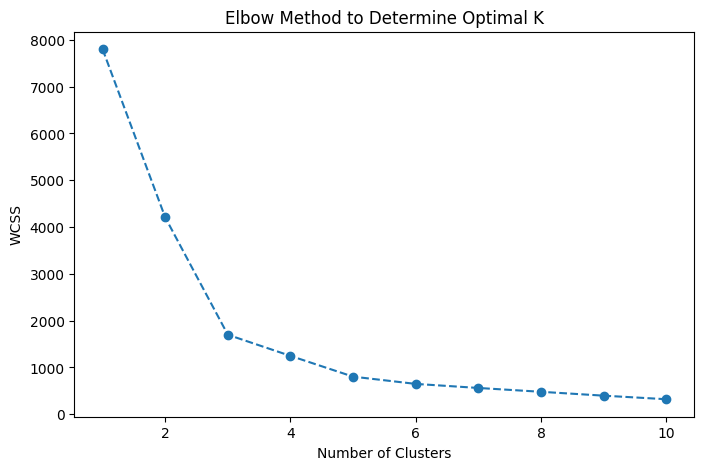

In [ ]:
# Step 4: Find optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Step 5: Plot Elbow Method Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

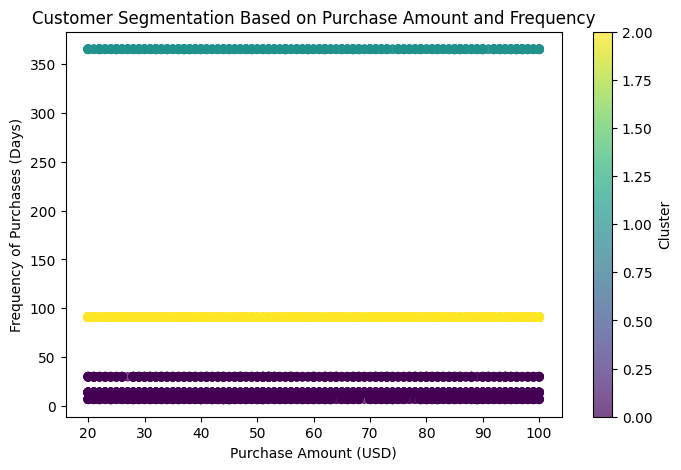

      purchase_amount_(usd) frequency_of_purchases  Cluster
0                        53            Fortnightly        0
1                        64            Fortnightly        0
2                        73                 Weekly        0
3                        90                 Weekly        0
4                        49               Annually        1
...                     ...                    ...      ...
3895                     28                 Weekly        0
3896                     49              Bi-Weekly        0
3897                     33              Quarterly        2
3898                     77                 Weekly        0
3899                     81              Quarterly        2

[3900 rows x 3 columns]


In [ ]:
# Step 6: Apply K-means clustering with the chosen K (assume K=3 from elbow method)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_customer['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Step 7: Visualize the Clusters
plt.figure(figsize=(8,5))
plt.scatter(df_customer['purchase_amount_(usd)'], df_customer['frequency_of_purchases_days'],
            c=df_customer['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency of Purchases (Days)')
plt.title('Customer Segmentation Based on Purchase Amount and Frequency')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display results
print(df_customer[['purchase_amount_(usd)', 'frequency_of_purchases', 'Cluster']])

## Interpretation of the Clusters
Cluster	Characteristics

Cluster 0 (Purple)	Customers who purchase more frequently (e.g., weekly, fortnightly) but may have varying spending amounts.

Cluster 1 (Green)	Customers who purchase less frequently (e.g., quarterly, bi-weekly, or every 3 months).

Cluster 2 (Yellow)	Customers who purchase very infrequently (e.g., annually), meaning they make large purchases but only once per year.
